## Import der Daten und grundlegende Analyse

### Import der Daten

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datei-Pfad für macOS anpassen
file_path = r"/Users/remofankhauser/20250222_istdaten.csv"

# Datei einlesen
df_raw = pd.read_csv(file_path, sep=None)

df_raw["ANKUNFTSZEIT"] = pd.to_datetime(df_raw["ANKUNFTSZEIT"])
df_raw["AN_PROGNOSE"] = pd.to_datetime(df_raw["AN_PROGNOSE"])
df_raw["ABFAHRTSZEIT"] = pd.to_datetime(df_raw["ABFAHRTSZEIT"])
df_raw["AB_PROGNOSE"] = pd.to_datetime(df_raw["AB_PROGNOSE"])

print(df_raw["ANKUNFTSZEIT"].dtype)
print(df_raw["AN_PROGNOSE"].dtype)
print(df_raw["ABFAHRTSZEIT"].dtype)
print(df_raw["AB_PROGNOSE"].dtype)



/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/2610303392.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_raw = pd.read_csv(file_path, sep=None)
/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/2610303392.py:11: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_raw["ANKUNFTSZEIT"] = pd.to_datetime(df_raw["ANKUNFTSZEIT"])
/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/2610303392.py:12: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_raw["AN_PROGNOSE"] = pd.to_datetime(df_raw["AN_PROGNOSE"])
/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipyke

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


### Analyse der Rohdaten

In [19]:
display(df_raw.head(5))

# Datenstruktur anzeigen
display(df_raw.info())

Verkehrsmittel = df_raw["PRODUKT_ID"].unique()
print(Verkehrsmittel)

Verkehrsbetriebe = df_raw["BETREIBER_NAME"].unique()
print(sorted(Verkehrsbetriebe))

Verkehrsbetriebe_abk = df_raw["BETREIBER_ABK"].unique()
print(sorted(Verkehrsbetriebe_abk))

Durchfahrten = df_raw["DURCHFAHRT_TF"].unique()
print(sorted(Durchfahrten))

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,22.02.2025,80:800631:17238:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17238,RB,NaN,RB,...,False,8500090,Basel Bad Bf,2025-02-22 07:05:00,2025-02-22 07:05:00,PROGNOSE,NaT,NaT,NaN,False
1,22.02.2025,80:800631:17239:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17239,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2025-02-22 07:53:00,2025-02-22 07:54:00,PROGNOSE,False
2,22.02.2025,80:800631:17241:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17241,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2025-02-22 08:53:00,2025-02-22 08:55:00,PROGNOSE,False
3,22.02.2025,80:800631:17243:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17243,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2025-02-22 09:53:00,2025-02-22 09:54:00,PROGNOSE,False
4,22.02.2025,80:800631:17244:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17244,RB,NaN,RB,...,False,8500090,Basel Bad Bf,2025-02-22 08:08:00,2025-02-22 08:09:00,PROGNOSE,NaT,NaT,NaN,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078207 entries, 0 to 2078206
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   BETRIEBSTAG          object        
 1   FAHRT_BEZEICHNER     object        
 2   BETREIBER_ID         object        
 3   BETREIBER_ABK        object        
 4   BETREIBER_NAME       object        
 5   PRODUKT_ID           object        
 6   LINIEN_ID            object        
 7   LINIEN_TEXT          object        
 8   UMLAUF_ID            object        
 9   VERKEHRSMITTEL_TEXT  object        
 10  ZUSATZFAHRT_TF       bool          
 11  FAELLT_AUS_TF        bool          
 12  BPUIC                int64         
 13  HALTESTELLEN_NAME    object        
 14  ANKUNFTSZEIT         datetime64[ns]
 15  AN_PROGNOSE          datetime64[ns]
 16  AN_PROGNOSE_STATUS   object        
 17  ABFAHRTSZEIT         datetime64[ns]
 18  AB_PROGNOSE          datetime64[ns]
 19  AB_PROGNOSE_STATUS   

None

['Zug' 'Bus' 'Zahnradbahn' 'Metro' 'Schiff' 'Tram' 'BUS']
['AFA Bus AG', 'Aare Seeland mobil (bti)', 'Aare Seeland mobil (rvo)', 'Aare Seeland mobil (snb)', 'Aargau Verkehr AG', 'Appenzeller Bahnen (ab)', 'Auto AG Rothenburg', 'Auto AG Schwyz', 'Auto AG Uri', 'Auto Leuk-Leukerbad', 'Autobetrieb Sernftal', 'Autobetrieb Weesen-Amden', 'Autobus AG Liestal', 'Autobusbetrieb Freienbach', 'Autobusbetrieb RBS', 'Autolinea Mendrisiense SA', 'Autolinee Bleniesi', 'Autolinee FART', 'Autolinee Regionali Luganesi', 'Automobil Rottal AG', 'Automobildienst Appenzeller Bahnen', 'Automobildienst Matterhorn Gotthard Bahn (fo auto)', 'Automobildienst SZU', 'Automobildienste Aare Seeland mobil', 'Automobiles CJ', 'Automobiles MBC', 'Autoservizi Silvestri Livigno', 'Autotransports de la Vallée de Joux', 'BLS AG (bls)', 'BLS Schifffahrt AG (ths)', 'BUS Oberthurgau AG', 'Bamert Bus', 'Baselland Transport', 'Basler Verkehrsbetriebe', 'Berner Oberland-Bahnen', 'Bus Nyon-Prangins', 'Bus Ostschweiz (Rheintal)',

## Analyse der VBZ Daten

### Filtern nach VBZ

In [20]:
df_filtered_vbz = df_raw[df_raw["BETREIBER_ABK"].str.contains("VBZ")]
display(df_filtered_vbz.head(5))

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
317450,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8596007,"Schlieren, Geissweid",NaT,NaT,NaN,2025-02-22 12:28:00,2025-02-22 12:27:55,REAL,False
317451,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8590805,"Schlieren, Zentrum/Bahnhof",2025-02-22 12:29:00,2025-02-22 12:28:43,REAL,2025-02-22 12:29:00,2025-02-22 12:29:27,REAL,False
317452,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8590803,"Schlieren, Wagonsfabrik",2025-02-22 12:30:00,2025-02-22 12:30:19,REAL,2025-02-22 12:30:00,2025-02-22 12:30:39,REAL,False
317453,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8590791,"Schlieren, Gasometerbrücke",2025-02-22 12:31:00,2025-02-22 12:31:19,REAL,2025-02-22 12:32:00,2025-02-22 12:31:43,REAL,False
317454,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8590795,"Schlieren, Mülligen",2025-02-22 12:33:00,2025-02-22 12:32:31,REAL,2025-02-22 12:33:00,2025-02-22 12:32:52,REAL,False


### Tram und Buslinien ausgeben

In [21]:
linien_verkehrsmittel_vbz = df_filtered_vbz.groupby("LINIEN_TEXT")["PRODUKT_ID"].unique()

# Ausgabe formatiert anzeigen
for linie, verkehrsmittel in linien_verkehrsmittel_vbz.items():
    #print(f"Linie {linie}: {', '.join(map(str, verkehrsmittel))}")
    print(f"{', '.join(map(str, verkehrsmittel))} {linie}")

Tram 10
Tram 11
Tram 12
Tram 13
Tram 14
Tram 15
Bus 161
Bus 162
Bus 163
Bus 165
Tram 17
Bus 184
Bus 185
Tram 2
Tram 3
Bus 301
Bus 302
Bus 304
Bus 305
Bus 306
Bus 307
Bus 309
Bus 31
Bus 314
Bus 317
Bus 32
Bus 325
Bus 33
Bus 35
Bus 37
Bus 38
Bus 39
Tram 4
Bus 40
Bus 46
Tram 5
Tram 6
Bus 61
Bus 62
Bus 64
Bus 66
Bus 67
Bus 69
Tram 7
Bus 70
Bus 701
Bus 703
Bus 704
Bus 705
Bus 72
Bus 73
Bus 743
Bus 75
Bus 751
Bus 76
Bus 77
Bus 78
Tram 8
Bus 80
Bus 83
Bus 89
Tram 9
Bus 910
Bus 912
Bus 916
Bus 918
Bus 919
Bus 99
Bus N1
Bus N10
Bus N11
Bus N12
Bus N13
Bus N14
Bus N15
Bus N16
Bus N17
Bus N18
Bus N2
Bus N3
Bus N30
Bus N31
Bus N32
Bus N34
Bus N36
Bus N4
Bus N5
Bus N6
Bus N7
Bus N71
Bus N74
Bus N8
Bus N9
Bus N91
Bus N99


In [22]:
for column in ["FAELLT_AUS_TF","DURCHFAHRT_TF"]:
    print(df_filtered_vbz[column].value_counts())

FAELLT_AUS_TF
False    214205
True       1113
Name: count, dtype: int64
DURCHFAHRT_TF
False    215318
Name: count, dtype: int64


In [23]:
df_filtered_vbz["VERSPAETUNG_AB"] = df_filtered_vbz["ABFAHRTSZEIT"] - df_filtered_vbz["AB_PROGNOSE"]
df_filtered_vbz["VERSPAETUNG_AB"] = df_filtered_vbz["VERSPAETUNG_AB"].dt.total_seconds() / 60

df_filtered_vbz_verspetungen_ab = df_filtered_vbz[df_filtered_vbz["VERSPAETUNG_AB"] > 10]

display(df_filtered_vbz_verspetungen_ab.head(10))
print(len(df_filtered_vbz_verspetungen_ab))



df_filtered_vbz["VERSPAETUNG_AN"] = df_filtered_vbz["ANKUNFTSZEIT"] - df_filtered_vbz["AN_PROGNOSE"]
df_filtered_vbz["VERSPAETUNG_AN"] = df_filtered_vbz["VERSPAETUNG_AN"].dt.total_seconds() / 60

df_filtered_vbz_verspetungen_an = df_filtered_vbz[df_filtered_vbz["VERSPAETUNG_AN"] > 0]
display(df_filtered_vbz_verspetungen_an.head(10))
print(len(df_filtered_vbz_verspetungen_an))

/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/1386011305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_vbz["VERSPAETUNG_AB"] = df_filtered_vbz["ABFAHRTSZEIT"] - df_filtered_vbz["AB_PROGNOSE"]
/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/1386011305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_vbz["VERSPAETUNG_AB"] = df_filtered_vbz["VERSPAETUNG_AB"].dt.total_seconds() / 60


,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB
321427,22.02.2025,85:3849:406503-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10003,T,...,8591236,"Zürich, Altes Krematorium",2025-02-22 20:28:00,2025-02-22 20:17:51,UNBEKANNT,2025-02-22 20:29:00,2025-02-22 20:17:52,UNBEKANNT,False,11.133333
321428,22.02.2025,85:3849:406503-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10003,T,...,8591038,"Zürich, Albisriederplatz",2025-02-22 20:29:00,2025-02-22 20:17:53,UNBEKANNT,2025-02-22 20:30:00,2025-02-22 20:17:54,UNBEKANNT,False,12.100000
321429,22.02.2025,85:3849:406503-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10003,T,...,8591218,"Zürich,Kalkbreite/Bhf.Wiedikon",2025-02-22 20:33:00,2025-02-22 20:17:55,UNBEKANNT,2025-02-22 20:33:00,2025-02-22 20:17:56,UNBEKANNT,False,15.066667
321430,22.02.2025,85:3849:406503-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10003,T,...,8591079,"Zürich, Bezirksgebäude",2025-02-22 20:34:00,2025-02-22 20:17:57,UNBEKANNT,2025-02-22 20:34:00,2025-02-22 20:17:58,UNBEKANNT,False,16.033333
321431,22.02.2025,85:3849:406503-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10003,T,...,8591381,"Zürich, Stauffacher",2025-02-22 20:35:00,2025-02-22 20:17:59,UNBEKANNT,2025-02-22 20:37:00,2025-02-22 20:18:00,UNBEKANNT,False,19.000000
321432,22.02.2025,85:3849:406503-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10003,T,...,8591369,"Zürich, Sihlstrasse",2025-02-22 20:38:00,2025-02-22 20:18:01,UNBEKANNT,2025-02-22 20:39:00,2025-02-22 20:18:02,UNBEKANNT,False,20.966667
321433,22.02.2025,85:3849:406503-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10003,T,...,8591299,"Zürich, Paradeplatz",2025-02-22 20:40:00,2025-02-22 20:18:03,UNBEKANNT,2025-02-22 20:40:00,2025-02-22 20:18:04,UNBEKANNT,False,21.933333
321434,22.02.2025,85:3849:406503-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10003,T,...,8591093,"Zürich, Kantonalbank",2025-02-22 20:41:00,2025-02-22 20:18:05,UNBEKANNT,2025-02-22 20:41:00,2025-02-22 20:18:06,UNBEKANNT,False,22.900000
321435,22.02.2025,85:3849:406503-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10003,T,...,8591105,"Zürich, Bürkliplatz",2025-02-22 20:43:00,2025-02-22 20:18:07,UNBEKANNT,2025-02-22 20:43:00,2025-02-22 20:18:08,UNBEKANNT,False,24.866667
321436,22.02.2025,85:3849:406503-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10003,T,...,8591448,"Zürich, Zypressenstrasse",2025-02-22 20:43:00,2025-02-22 20:18:09,PROGNOSE,2025-02-22 20:43:00,2025-02-22 20:18:10,REAL,False,24.833333


23


/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/1386011305.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_vbz["VERSPAETUNG_AN"] = df_filtered_vbz["ANKUNFTSZEIT"] - df_filtered_vbz["AN_PROGNOSE"]
/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/1386011305.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_vbz["VERSPAETUNG_AN"] = df_filtered_vbz["VERSPAETUNG_AN"].dt.total_seconds() / 60


,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB,VERSPAETUNG_AN
317451,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Schlieren, Zentrum/Bahnhof",2025-02-22 12:29:00,2025-02-22 12:28:43,REAL,2025-02-22 12:29:00,2025-02-22 12:29:27,REAL,False,-0.450000,0.283333
317454,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Schlieren, Mülligen",2025-02-22 12:33:00,2025-02-22 12:32:31,REAL,2025-02-22 12:33:00,2025-02-22 12:32:52,REAL,False,0.133333,0.483333
317456,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Farbhof",2025-02-22 12:35:00,2025-02-22 12:34:55,REAL,2025-02-22 12:35:00,2025-02-22 12:35:15,REAL,False,-0.250000,0.083333
317458,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Lindenplatz",2025-02-22 12:37:00,2025-02-22 12:36:59,REAL,2025-02-22 12:37:00,2025-02-22 12:37:18,REAL,False,-0.300000,0.016667
317459,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Grimselstrasse",2025-02-22 12:38:00,2025-02-22 12:37:59,REAL,2025-02-22 12:38:00,2025-02-22 12:38:30,REAL,False,-0.500000,0.016667
317460,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Kappeli",2025-02-22 12:40:00,2025-02-22 12:39:29,REAL,2025-02-22 12:40:00,2025-02-22 12:39:56,REAL,False,0.066667,0.516667
317461,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Freihofstrasse",2025-02-22 12:41:00,2025-02-22 12:40:53,REAL,2025-02-22 12:41:00,2025-02-22 12:41:07,REAL,False,-0.116667,0.116667
317462,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Letzigrund",2025-02-22 12:42:00,2025-02-22 12:41:59,REAL,2025-02-22 12:42:00,2025-02-22 12:42:13,REAL,False,-0.216667,0.016667
317465,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Lochergut",2025-02-22 12:46:00,2025-02-22 12:45:58,REAL,2025-02-22 12:46:00,2025-02-22 12:45:59,REAL,False,0.016667,0.033333
317473,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Bellevue",2025-02-22 13:00:00,2025-02-22 12:59:59,REAL,2025-02-22 13:00:00,2025-02-22 13:00:26,REAL,False,-0.433333,0.016667


27174


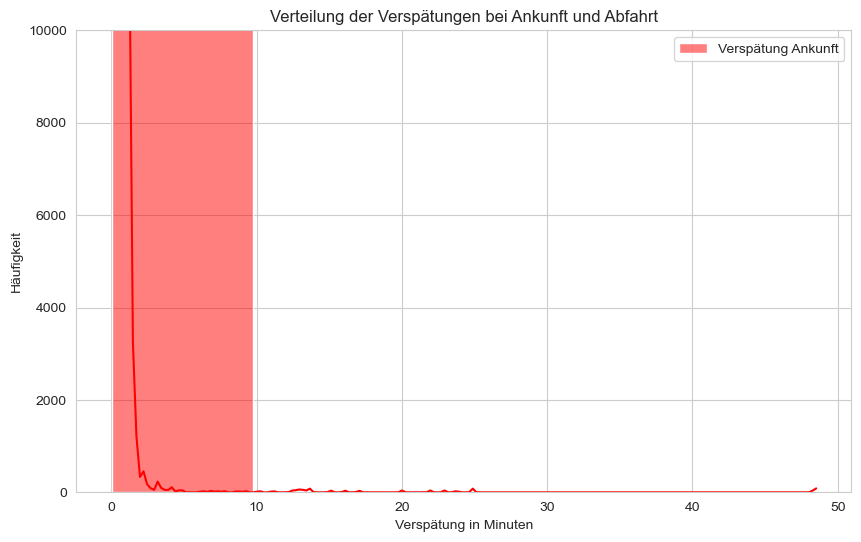

In [34]:
sns.set_style("whitegrid")

# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_vbz_verspetungen_an, x="VERSPAETUNG_AN", kde=True, color="red", label="Verspätung Ankunft", bins=5)

# Achsenbeschriftung und Titel
plt.xlabel("Verspätung in Minuten")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Verspätungen bei Ankunft und Abfahrt")
plt.ylim(0, 10000)

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()

## Analyse der SBB Daten

In [25]:
df_filtered_sbb = df_raw[df_raw["BETREIBER_ABK"].str.contains("SBB")]
display(df_filtered_sbb.head(5))

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
163,22.02.2025,80:L7____:87875:000,80:L7____,SBB,SBB GmbH,Zug,87875,S6,NaN,S,...,False,8500090,Basel Bad Bf,2025-02-22 01:19:00,2025-02-22 01:18:00,PROGNOSE,NaT,NaT,NaN,False
570,22.02.2025,ch:1:sjyid:100001:10-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,10,EC,NaN,EC,...,False,8505307,Chiasso,2025-02-22 07:58:00,2025-02-22 08:00:20,REAL,2025-02-22 08:05:00,2025-02-22 08:07:07,REAL,False
571,22.02.2025,ch:1:sjyid:100001:10-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,10,EC,NaN,EC,...,False,8505300,Lugano,2025-02-22 08:28:00,2025-02-22 08:27:38,REAL,2025-02-22 08:30:00,2025-02-22 08:30:23,REAL,False
572,22.02.2025,ch:1:sjyid:100001:10-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,10,EC,NaN,EC,...,False,8505213,Bellinzona,2025-02-22 08:46:00,2025-02-22 08:45:45,REAL,2025-02-22 08:47:00,2025-02-22 08:48:19,REAL,False
573,22.02.2025,ch:1:sjyid:100001:10-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,10,EC,NaN,EC,...,False,8505004,Arth-Goldau,2025-02-22 09:42:00,2025-02-22 09:40:51,REAL,2025-02-22 09:45:00,2025-02-22 09:45:20,REAL,False


In [26]:
df_filtered_sbb["VERSPAETUNG_AB"] = df_filtered_sbb["ABFAHRTSZEIT"] - df_filtered_sbb["AB_PROGNOSE"]
df_filtered_sbb["VERSPAETUNG_AB"] = df_filtered_sbb["VERSPAETUNG_AB"].dt.total_seconds() / 60

df_filtered_sbb_verspetungen_ab = df_filtered_sbb[df_filtered_sbb["VERSPAETUNG_AB"] > 0]

display(df_filtered_sbb_verspetungen_ab.head(10))
print(len(df_filtered_sbb_verspetungen_ab))


df_filtered_sbb["VERSPAETUNG_AN"] = df_filtered_sbb["ANKUNFTSZEIT"] - df_filtered_sbb["AN_PROGNOSE"]
df_filtered_sbb["VERSPAETUNG_AN"] = df_filtered_sbb["VERSPAETUNG_AN"].dt.total_seconds() / 60

df_filtered_sbb_verspetungen_an = df_filtered_sbb[df_filtered_sbb["VERSPAETUNG_AN"] > 0]

display(df_filtered_sbb_verspetungen_an.head(10))

/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/4109106931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_sbb["VERSPAETUNG_AB"] = df_filtered_sbb["ABFAHRTSZEIT"] - df_filtered_sbb["AB_PROGNOSE"]
/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/4109106931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_sbb["VERSPAETUNG_AB"] = df_filtered_sbb["VERSPAETUNG_AB"].dt.total_seconds() / 60


,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB
591,22.02.2025,ch:1:sjyid:100001:11-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,11,EC,NaN,EC,...,8505307,Chiasso,2025-02-22 09:55:00,2025-02-22 09:51:03,REAL,2025-02-22 10:02:00,2025-02-22 10:01:50,REAL,False,0.166667
1231,22.02.2025,ch:1:sjyid:100001:13772-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,13772,SN7,NaN,SN,...,8503101,Küsnacht ZH,2025-02-22 01:55:00,2025-02-22 01:55:08,REAL,2025-02-22 01:56:00,2025-02-22 01:55:55,REAL,False,0.083333
1388,22.02.2025,ch:1:sjyid:100001:13782-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,13782,SN8,NaN,SN,...,8503205,Au ZH,2025-02-22 01:33:00,2025-02-22 01:32:15,REAL,2025-02-22 01:33:00,2025-02-22 01:32:58,REAL,False,0.033333
1399,22.02.2025,ch:1:sjyid:100001:13782-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,13782,SN8,NaN,SN,...,8503129,Wallisellen,2025-02-22 02:09:00,2025-02-22 02:07:53,REAL,2025-02-22 02:09:00,2025-02-22 02:08:59,REAL,False,0.016667
1403,22.02.2025,ch:1:sjyid:100001:13782-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,13782,SN8,NaN,SN,...,8503302,Fehraltorf,2025-02-22 02:26:00,2025-02-22 02:25:48,REAL,2025-02-22 02:26:00,2025-02-22 02:25:59,REAL,False,0.016667
1458,22.02.2025,ch:1:sjyid:100001:13785-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,13785,SN8,NaN,SN,...,8503129,Wallisellen,2025-02-22 03:03:00,2025-02-22 03:01:41,REAL,2025-02-22 03:03:00,2025-02-22 03:02:09,REAL,False,0.850000
1484,22.02.2025,ch:1:sjyid:100001:13786-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,13786,SN8,NaN,SN,...,8503205,Au ZH,2025-02-22 03:33:00,2025-02-22 03:31:59,REAL,2025-02-22 03:33:00,2025-02-22 03:32:58,REAL,False,0.033333
1826,22.02.2025,ch:1:sjyid:100001:13837-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,13837,SN,NaN,SN,...,8501110,Ependes VD,2025-02-22 01:20:00,2025-02-22 01:19:36,REAL,2025-02-22 01:20:00,2025-02-22 01:19:53,REAL,False,0.116667
1829,22.02.2025,ch:1:sjyid:100001:13837-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,13837,SN,NaN,SN,...,8501113,Bavois,2025-02-22 01:28:00,2025-02-22 01:27:32,REAL,2025-02-22 01:28:00,2025-02-22 01:27:49,REAL,False,0.183333
1832,22.02.2025,ch:1:sjyid:100001:13837-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,13837,SN,NaN,SN,...,8501116,Vufflens-la-Ville,2025-02-22 01:39:00,2025-02-22 01:38:44,REAL,2025-02-22 01:39:00,2025-02-22 01:38:58,REAL,False,0.033333


491


/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/4109106931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_sbb["VERSPAETUNG_AN"] = df_filtered_sbb["ANKUNFTSZEIT"] - df_filtered_sbb["AN_PROGNOSE"]
/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_41227/4109106931.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_sbb["VERSPAETUNG_AN"] = df_filtered_sbb["VERSPAETUNG_AN"].dt.total_seconds() / 60


,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB,VERSPAETUNG_AN
163,22.02.2025,80:L7____:87875:000,80:L7____,SBB,SBB GmbH,Zug,87875,S6,NaN,S,...,Basel Bad Bf,2025-02-22 01:19:00,2025-02-22 01:18:00,PROGNOSE,NaT,NaT,NaN,False,NaN,1.000000
571,22.02.2025,ch:1:sjyid:100001:10-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,10,EC,NaN,EC,...,Lugano,2025-02-22 08:28:00,2025-02-22 08:27:38,REAL,2025-02-22 08:30:00,2025-02-22 08:30:23,REAL,False,-0.383333,0.366667
572,22.02.2025,ch:1:sjyid:100001:10-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,10,EC,NaN,EC,...,Bellinzona,2025-02-22 08:46:00,2025-02-22 08:45:45,REAL,2025-02-22 08:47:00,2025-02-22 08:48:19,REAL,False,-1.316667,0.250000
573,22.02.2025,ch:1:sjyid:100001:10-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,10,EC,NaN,EC,...,Arth-Goldau,2025-02-22 09:42:00,2025-02-22 09:40:51,REAL,2025-02-22 09:45:00,2025-02-22 09:45:20,REAL,False,-0.333333,1.150000
574,22.02.2025,ch:1:sjyid:100001:10-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,10,EC,NaN,EC,...,Zug,2025-02-22 10:00:00,2025-02-22 09:59:24,REAL,2025-02-22 10:01:00,2025-02-22 10:03:03,REAL,False,-2.050000,0.600000
582,22.02.2025,ch:1:sjyid:100001:1064-002,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1064,ICE,NaN,ICE,...,Basel Bad Bf,2025-02-22 20:08:00,2025-02-22 20:01:00,PROGNOSE,2025-02-22 20:10:00,2025-02-22 20:10:00,PROGNOSE,False,0.000000,7.000000
583,22.02.2025,ch:1:sjyid:100001:1064-002,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1064,ICE,NaN,ICE,...,Basel SBB,2025-02-22 20:18:00,2025-02-22 20:16:11,REAL,NaT,NaT,NaN,False,NaN,1.816667
587,22.02.2025,ch:1:sjyid:100001:11-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,11,EC,NaN,EC,...,Zug,2025-02-22 07:59:00,2025-02-22 07:58:24,REAL,2025-02-22 08:00:00,2025-02-22 08:00:42,REAL,False,-0.700000,0.600000
588,22.02.2025,ch:1:sjyid:100001:11-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,11,EC,NaN,EC,...,Arth-Goldau,2025-02-22 08:16:00,2025-02-22 08:15:21,REAL,2025-02-22 08:18:00,2025-02-22 08:19:45,REAL,False,-1.750000,0.650000
589,22.02.2025,ch:1:sjyid:100001:11-001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,11,EC,NaN,EC,...,Bellinzona,2025-02-22 09:12:00,2025-02-22 09:11:09,REAL,2025-02-22 09:14:00,2025-02-22 09:14:23,REAL,False,-0.383333,0.850000
